# K-Means Clustring On INCOME Dataset

In [13]:
##Importing the packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans

In [2]:
#Import Income dataset
data = pd.read_csv('income.csv')

In [3]:
data.head() #Display first 5 rows of the data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


### Exploratory Data Analysis (EDA)

In [4]:
#Find the size of the data Rows x Columns
data.shape

(22, 3)

The data consists of 22 rows and 3 columns

In [5]:
#Find Basic Statistics like count, mean, standard deviation, min, max etc.
data.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


- Count of 22 for all the fields indicates that there are no missing values in any of the field
- Minimum(min) and Maximum(max) defines the range of values for that field.
- Mean(mean) indicates average of all the values in the field. There is large variation of mean values of the fields so we need to scale the data.
- 25%, 50%, 75% percentiles indicates the distribution of data

In [6]:
#Find the the information about the fields, field datatypes and Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


Info fuction is used to list all the field names, their datatypes, count of elements in the field and if the field contacts Null values.

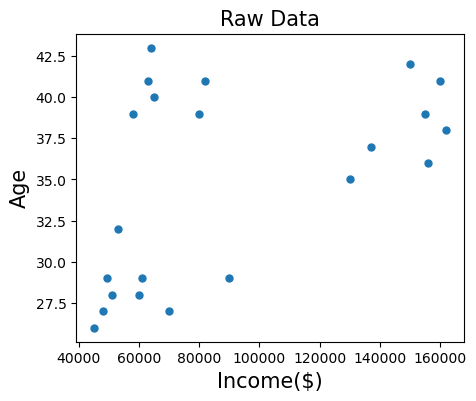

In [7]:
plt.figure(figsize=(5,4))
plt.scatter(data['Income($)'], data['Age'], s = 25) #Point size is 25
plt.title('Raw Data',fontsize=15)
plt.xlabel('Income($)',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

In [10]:
target = data.iloc[:,[1,2]]
X = np.array(target)

In [11]:
#Finding kmeans using no. of clusters = 2
kmeans = KMeans(n_clusters = 2, max_iter = 500, n_init = 10, random_state = 0)
kmeans_preds = kmeans.fit_predict(X)

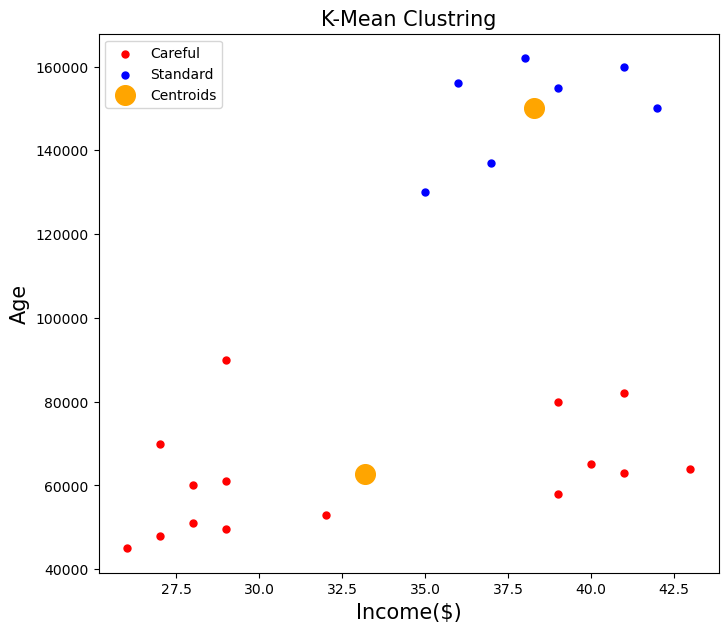

In [14]:
#Plot the Income with respective to age with centroids from KMeans Algorithm
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']

plt.figure(figsize = (8,7))
for i in range(2):
    plt.scatter(X[kmeans_preds == i,0], X[kmeans_preds == i,1], s = point_size, c = colors[i], label = labels[i])
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'orange', label = 'Centroids')
plt.title('K-Mean Clustring',fontsize=15)
plt.xlabel('Income($)',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.legend(loc = 'best')
plt.show()